## Problem Statement

In the telecom industry, customers are able to choose from multiple service providers and actively switch from one operator to another. In this highly competitive market, the telecommunications industry experiences an average of 15-25% annual churn rate. Given the fact that it costs 5-10 times more to acquire a new customer than to retain an existing one, customer retention has now become even more important than customer acquisition.

 

For many incumbent operators, retaining high profitable customers is the number one business goal.

 

To reduce customer churn, telecom companies need to predict which customers are at high risk of churn.

 

In this project, you will analyse customer-level data of a leading telecom firm, build predictive models to identify customers at high risk of churn and identify the main indicators of churn.

### Importing necessary libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import itertools

In [2]:
churn_data = pd.read_csv('telecom_churn_data.csv')
churn_data.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,...,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,...,0,1.0,1.0,1.0,NaN,968,30.4,0.0,101.20,3.58
1,7001865778,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,34.047,...,0,NaN,1.0,1.0,NaN,1006,0.0,0.0,0.00,0.00
2,7001625959,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,167.690,...,0,NaN,NaN,NaN,1.0,1103,0.0,0.0,4.17,0.00
3,7001204172,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,221.338,...,0,NaN,NaN,NaN,NaN,2491,0.0,0.0,0.00,0.00
4,7000142493,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,261.636,...,0,0.0,NaN,NaN,NaN,1526,0.0,0.0,0.00,0.00


### Understanding the data structure and quality

In [3]:
churn_data.shape

(99999, 226)

In [4]:
info = churn_data.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Data columns (total 226 columns):
 #    Column                    Dtype  
---   ------                    -----  
 0    mobile_number             int64  
 1    circle_id                 int64  
 2    loc_og_t2o_mou            float64
 3    std_og_t2o_mou            float64
 4    loc_ic_t2o_mou            float64
 5    last_date_of_month_6      object 
 6    last_date_of_month_7      object 
 7    last_date_of_month_8      object 
 8    last_date_of_month_9      object 
 9    arpu_6                    float64
 10   arpu_7                    float64
 11   arpu_8                    float64
 12   arpu_9                    float64
 13   onnet_mou_6               float64
 14   onnet_mou_7               float64
 15   onnet_mou_8               float64
 16   onnet_mou_9               float64
 17   offnet_mou_6              float64
 18   offnet_mou_7              float64
 19   offnet_mou_8              float64
 20   offn

<AxesSubplot:>

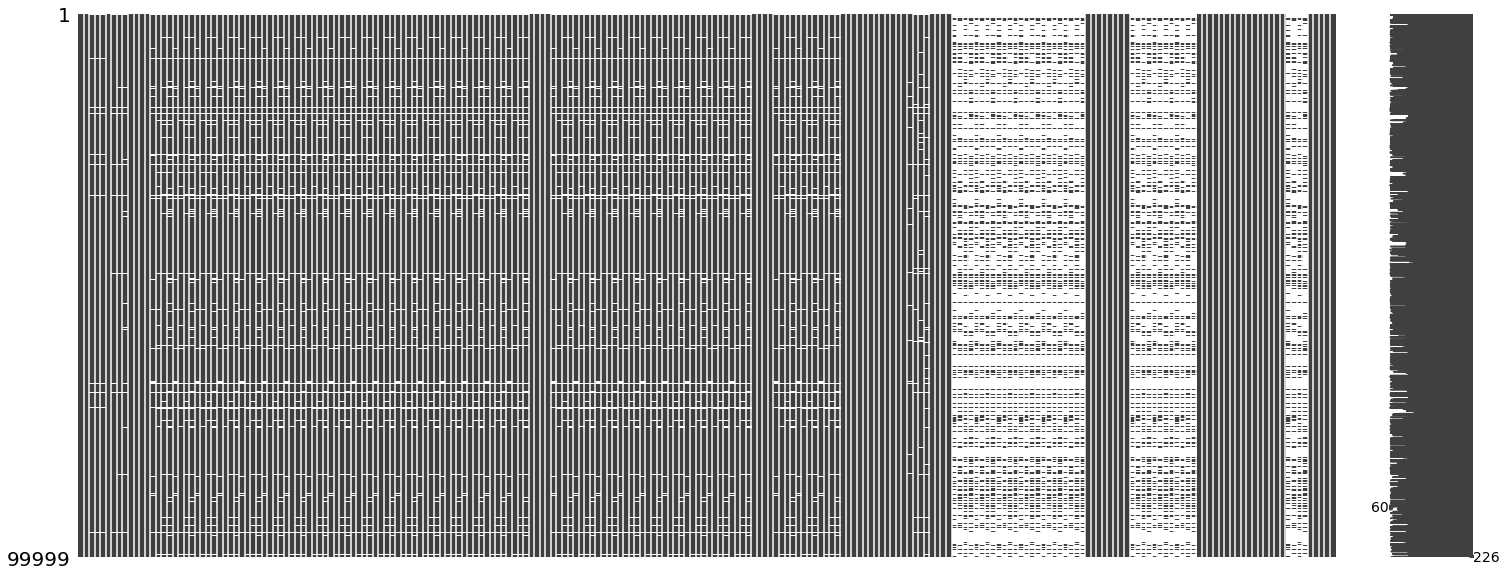

In [5]:
import missingno as mn
mn.matrix(churn_data)

##### Analysing recharge data

In [6]:
recharge_columns =  churn_data.columns[churn_data.columns.str.contains('rech')]
print(recharge_columns)

Index(['total_rech_num_6', 'total_rech_num_7', 'total_rech_num_8',
       'total_rech_num_9', 'total_rech_amt_6', 'total_rech_amt_7',
       'total_rech_amt_8', 'total_rech_amt_9', 'max_rech_amt_6',
       'max_rech_amt_7', 'max_rech_amt_8', 'max_rech_amt_9',
       'date_of_last_rech_6', 'date_of_last_rech_7', 'date_of_last_rech_8',
       'date_of_last_rech_9', 'date_of_last_rech_data_6',
       'date_of_last_rech_data_7', 'date_of_last_rech_data_8',
       'date_of_last_rech_data_9', 'total_rech_data_6', 'total_rech_data_7',
       'total_rech_data_8', 'total_rech_data_9', 'max_rech_data_6',
       'max_rech_data_7', 'max_rech_data_8', 'max_rech_data_9',
       'count_rech_2g_6', 'count_rech_2g_7', 'count_rech_2g_8',
       'count_rech_2g_9', 'count_rech_3g_6', 'count_rech_3g_7',
       'count_rech_3g_8', 'count_rech_3g_9', 'av_rech_amt_data_6',
       'av_rech_amt_data_7', 'av_rech_amt_data_8', 'av_rech_amt_data_9'],
      dtype='object')


In [7]:
len(recharge_columns)

40

In [8]:
churn_data[list(recharge_columns)].describe()

,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,...,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9
count,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,...,26339.000000,25922.000000,25153.000000,25571.000000,26339.000000,25922.000000,25153.000000,25571.000000,26339.000000,25922.000000
mean,7.558806,7.700367,7.212912,6.893019,327.514615,322.962970,324.157122,303.345673,104.637486,104.752398,...,2.016288,1.781807,0.599133,0.621720,0.635711,0.659363,192.600982,200.981292,197.526489,192.734315
std,7.078405,7.070422,7.203753,7.096261,398.019701,408.114237,416.540455,404.588583,120.614894,124.523970,...,2.720132,2.214701,1.274428,1.394524,1.422827,1.411513,192.646318,196.791224,191.301305,188.400286
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.500000,0.500000,1.000000
25%,3.000000,3.000000,3.000000,3.000000,109.000000,100.000000,90.000000,52.000000,30.000000,30.000000,...,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,82.000000,92.000000,87.000000,69.000000
50%,6.000000,6.000000,5.000000,5.000000,230.000000,220.000000,225.000000,200.000000,110.000000,110.000000,...,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,154.000000,154.000000,154.000000,164.000000
75%,9.000000,10.000000,9.000000,9.000000,437.500000,428.000000,434.500000,415.000000,120.000000,128.000000,...,2.000000,2.000000,1.000000,1.000000,1.000000,1.000000,252.000000,252.000000,252.000000,252.000000
max,307.000000,138.000000,196.000000,131.000000,35190.000000,40335.000000,45320.000000,37235.000000,4010.000000,4010.000000,...,44.000000,40.000000,29.000000,35.000000,45.000000,49.000000,7546.000000,4365.000000,4076.000000,4061.000000


In [9]:
churn_data[list(recharge_columns)] = churn_data[list(recharge_columns)].replace(np.NaN, 0.0)

In [10]:
churn_data[list(recharge_columns)].head()

,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,...,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9
0,4,3,2,6,362,252,252,0,252,252,...,0.0,0.0,1.0,1.0,1.0,0.0,252.0,252.0,252.0,0.0
1,4,9,11,5,74,384,283,121,44,154,...,2.0,0.0,0.0,0.0,0.0,0.0,0.0,154.0,50.0,0.0
2,5,4,2,7,168,315,116,358,86,200,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,46.0
3,10,11,18,14,230,310,601,410,60,50,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,5,6,3,4,196,350,287,200,56,110,...,0.0,0.0,0.0,0.0,0.0,0.0,56.0,0.0,0.0,0.0


#### We can create new features based on total data recharge value for each customer for all the months

In [11]:
churn_data['total_rech_amt_data_6'] = churn_data.av_rech_amt_data_6 * churn_data.total_rech_data_6
churn_data['total_rech_amt_data_7'] = churn_data.av_rech_amt_data_7 * churn_data.total_rech_data_7
churn_data['total_rech_amt_data_8'] = churn_data.av_rech_amt_data_8 * churn_data.total_rech_data_8

#### We can also define the average mount for good phase that is month 6 and 7

In [12]:
churn_data['total_avg_rech_amnt_good_phase'] = (churn_data.total_rech_amt_6 + churn_data.total_rech_amt_data_6 \
                                               + churn_data.total_rech_amt_7+ churn_data.total_rech_amt_data_7)/2

## Filtering high value customers

In [13]:
amt_threshold =  churn_data.total_avg_rech_amnt_good_phase.quantile(0.7)
amt_threshold

478.0

In [14]:
churn_data_hvc = churn_data[churn_data.total_avg_rech_amnt_good_phase > amt_threshold]
churn_data_hvc.shape

(29953, 230)

### Tagging the churners

#### We can define a new column called churn and initially set it to zero then we can set it 1 to the potential churners based on incoming and outgoing minutes of usage and volume of data used

In [15]:
churn_data_hvc['churn']= 0

In [16]:
is_churned = (churn_data_hvc.total_ic_mou_9 == 0) & \
             (churn_data_hvc.total_og_mou_9 == 0) & \
             (churn_data_hvc.vol_2g_mb_9 ==0) & \
             (churn_data_hvc.vol_3g_mb_9 ==0)

In [17]:
churn_data_hvc.loc[is_churned,'churn']=1

In [18]:
churn_data_hvc.churn.describe()

count    29953.000000
mean         0.081227
std          0.273188
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: churn, dtype: float64

In [19]:
churn_data_hvc.churn.value_counts()

0    27520
1     2433
Name: churn, dtype: int64

#### We can see there is heavy imbalance in data

##### Now we can remove all the columns related to the churn phase i.e col that contains 9

In [20]:
churn_month_columns =  churn_data_hvc.columns[churn_data_hvc.columns.str.contains('_9')]
churn_month_columns

Index(['last_date_of_month_9', 'arpu_9', 'onnet_mou_9', 'offnet_mou_9',
       'roam_ic_mou_9', 'roam_og_mou_9', 'loc_og_t2t_mou_9',
       'loc_og_t2m_mou_9', 'loc_og_t2f_mou_9', 'loc_og_t2c_mou_9',
       'loc_og_mou_9', 'std_og_t2t_mou_9', 'std_og_t2m_mou_9',
       'std_og_t2f_mou_9', 'std_og_t2c_mou_9', 'std_og_mou_9', 'isd_og_mou_9',
       'spl_og_mou_9', 'og_others_9', 'total_og_mou_9', 'loc_ic_t2t_mou_9',
       'loc_ic_t2m_mou_9', 'loc_ic_t2f_mou_9', 'loc_ic_mou_9',
       'std_ic_t2t_mou_9', 'std_ic_t2m_mou_9', 'std_ic_t2f_mou_9',
       'std_ic_t2o_mou_9', 'std_ic_mou_9', 'total_ic_mou_9', 'spl_ic_mou_9',
       'isd_ic_mou_9', 'ic_others_9', 'total_rech_num_9', 'total_rech_amt_9',
       'max_rech_amt_9', 'date_of_last_rech_9', 'last_day_rch_amt_9',
       'date_of_last_rech_data_9', 'total_rech_data_9', 'max_rech_data_9',
       'count_rech_2g_9', 'count_rech_3g_9', 'av_rech_amt_data_9',
       'vol_2g_mb_9', 'vol_3g_mb_9', 'arpu_3g_9', 'arpu_2g_9',
       'night_pck_user

In [21]:
churn_data_hvc.drop(churn_month_columns,axis=1,inplace=True)

In [22]:
churn_data_hvc.shape

(29953, 177)

In [23]:
churn_data_hvc.isna().sum()

mobile_number                       0
circle_id                           0
loc_og_t2o_mou                    223
std_og_t2o_mou                    223
loc_ic_t2o_mou                    223
                                 ... 
total_rech_amt_data_6               0
total_rech_amt_data_7               0
total_rech_amt_data_8               0
total_avg_rech_amnt_good_phase      0
churn                               0
Length: 177, dtype: int64

In [24]:
col_info= round(churn_data_hvc.isnull().sum() / churn_data_hvc.shape[0] * 100.00,2)
col_info[col_info>0].sort_values(ascending=False)

fb_user_8               46.80
night_pck_user_8        46.80
arpu_2g_8               46.80
arpu_3g_8               46.80
fb_user_6               44.11
                        ...  
std_og_t2o_mou           0.74
loc_ic_t2o_mou           0.74
loc_og_t2o_mou           0.74
last_date_of_month_8     0.55
last_date_of_month_7     0.09
Length: 104, dtype: float64

### EDA

In [25]:
### Categorical columns
cat_cols = [col for col in churn_data_hvc.columns if churn_data_hvc[col].dtype =='object']
cat_cols

['last_date_of_month_6',
 'last_date_of_month_7',
 'last_date_of_month_8',
 'date_of_last_rech_6',
 'date_of_last_rech_7',
 'date_of_last_rech_8',
 'date_of_last_rech_data_6',
 'date_of_last_rech_data_7',
 'date_of_last_rech_data_8']

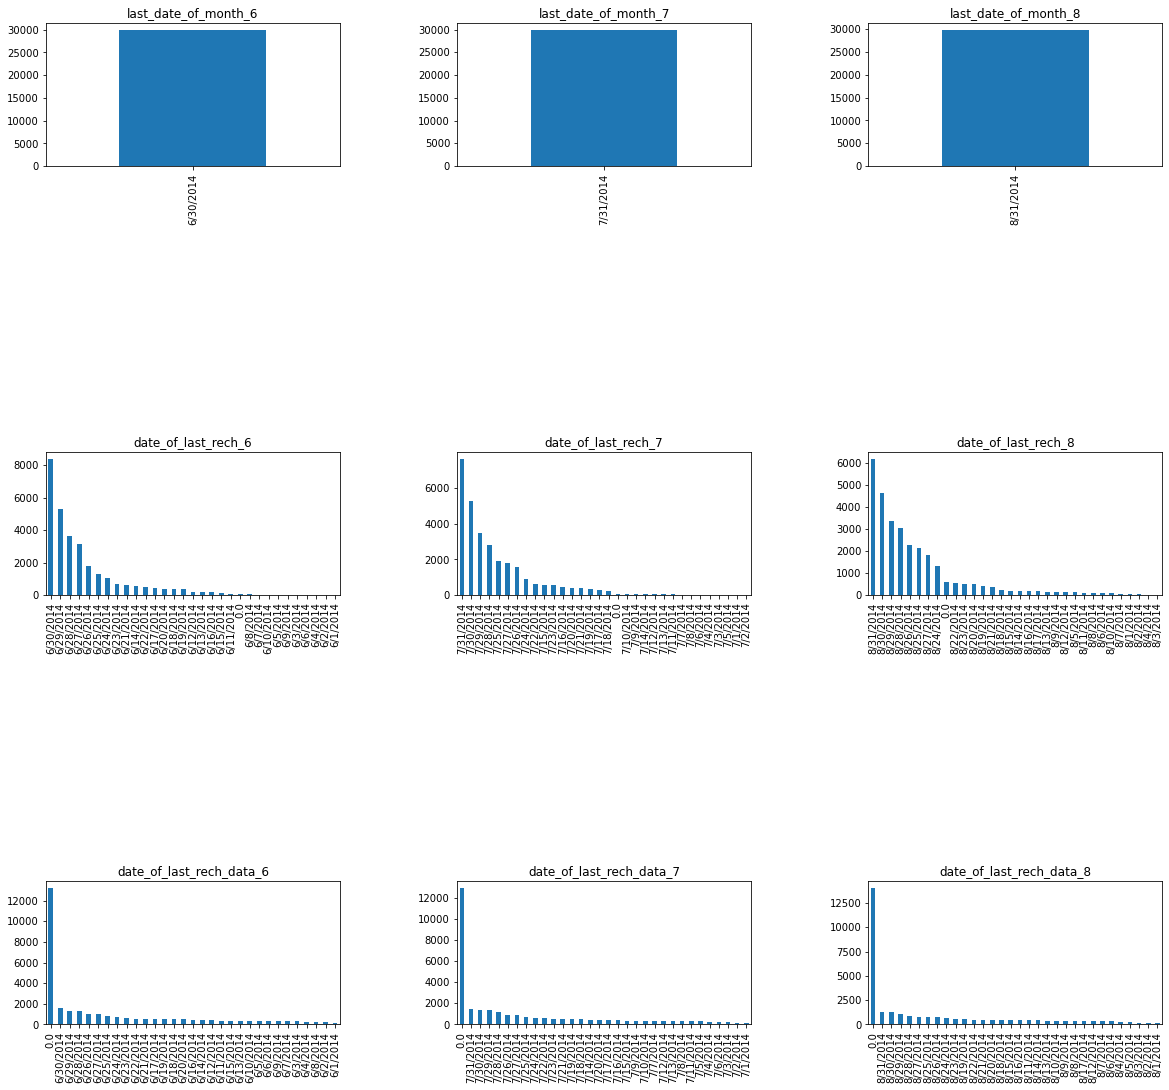

In [26]:
plt.figure(figsize=(20,50))
#fig, axs = plt.subplots(19)
for column,pos in itertools.zip_longest(cat_cols,range(len(cat_cols))):
    plt.subplot(7,3,pos+1)
    plt.subplots_adjust(
                    wspace=0.4,
                    hspace=2)
    axs=churn_data_hvc[column].value_counts().plot.bar()
    plt.title(column)

We can see that the columns 'last_date_of_month_6', 'last_date_of_month_7' and  'last_date_of_month_8' contains only 1 value so we can drop them

In [27]:
cat_cols_to_drop = ['last_date_of_month_6', 'last_date_of_month_7', 'last_date_of_month_8']
churn_data_hvc.drop(cat_cols_to_drop,axis=1,inplace=True)

In [28]:
num_cols = [col for col in churn_data_hvc.columns if churn_data_hvc[col].dtype =='int64'or'float64']
num_cols

['mobile_number',
 'circle_id',
 'loc_og_t2o_mou',
 'std_og_t2o_mou',
 'loc_ic_t2o_mou',
 'arpu_6',
 'arpu_7',
 'arpu_8',
 'onnet_mou_6',
 'onnet_mou_7',
 'onnet_mou_8',
 'offnet_mou_6',
 'offnet_mou_7',
 'offnet_mou_8',
 'roam_ic_mou_6',
 'roam_ic_mou_7',
 'roam_ic_mou_8',
 'roam_og_mou_6',
 'roam_og_mou_7',
 'roam_og_mou_8',
 'loc_og_t2t_mou_6',
 'loc_og_t2t_mou_7',
 'loc_og_t2t_mou_8',
 'loc_og_t2m_mou_6',
 'loc_og_t2m_mou_7',
 'loc_og_t2m_mou_8',
 'loc_og_t2f_mou_6',
 'loc_og_t2f_mou_7',
 'loc_og_t2f_mou_8',
 'loc_og_t2c_mou_6',
 'loc_og_t2c_mou_7',
 'loc_og_t2c_mou_8',
 'loc_og_mou_6',
 'loc_og_mou_7',
 'loc_og_mou_8',
 'std_og_t2t_mou_6',
 'std_og_t2t_mou_7',
 'std_og_t2t_mou_8',
 'std_og_t2m_mou_6',
 'std_og_t2m_mou_7',
 'std_og_t2m_mou_8',
 'std_og_t2f_mou_6',
 'std_og_t2f_mou_7',
 'std_og_t2f_mou_8',
 'std_og_t2c_mou_6',
 'std_og_t2c_mou_7',
 'std_og_t2c_mou_8',
 'std_og_mou_6',
 'std_og_mou_7',
 'std_og_mou_8',
 'isd_og_mou_6',
 'isd_og_mou_7',
 'isd_og_mou_8',
 'spl_og_mou_6

In [29]:
def plot_box_chart(attribute):
    plt.figure(figsize=(20,16))
    df = churn_data_hvc
    plt.subplot(2,3,1)
    sns.boxplot(data=df, y=attribute,x="churn",hue="churn",
                showfliers=False,palette=("plasma"))
    plt.subplot(2,3,2)
    sns.boxplot(data=df, y=attribute,x="churn",hue="churn",
                showfliers=False,palette=("plasma"))
    plt.subplot(2,3,3)
    sns.boxplot(data=df, y=attribute,x="churn",hue="churn",
                showfliers=False,palette=("plasma"))
    plt.show()

##### Recharge Variables

In [30]:
recharge_amnt_columns =  churn_data_hvc.columns[churn_data_hvc.columns.str.contains('rech_amt')]
list(recharge_amnt_columns)

['total_rech_amt_6',
 'total_rech_amt_7',
 'total_rech_amt_8',
 'max_rech_amt_6',
 'max_rech_amt_7',
 'max_rech_amt_8',
 'av_rech_amt_data_6',
 'av_rech_amt_data_7',
 'av_rech_amt_data_8',
 'total_rech_amt_data_6',
 'total_rech_amt_data_7',
 'total_rech_amt_data_8']

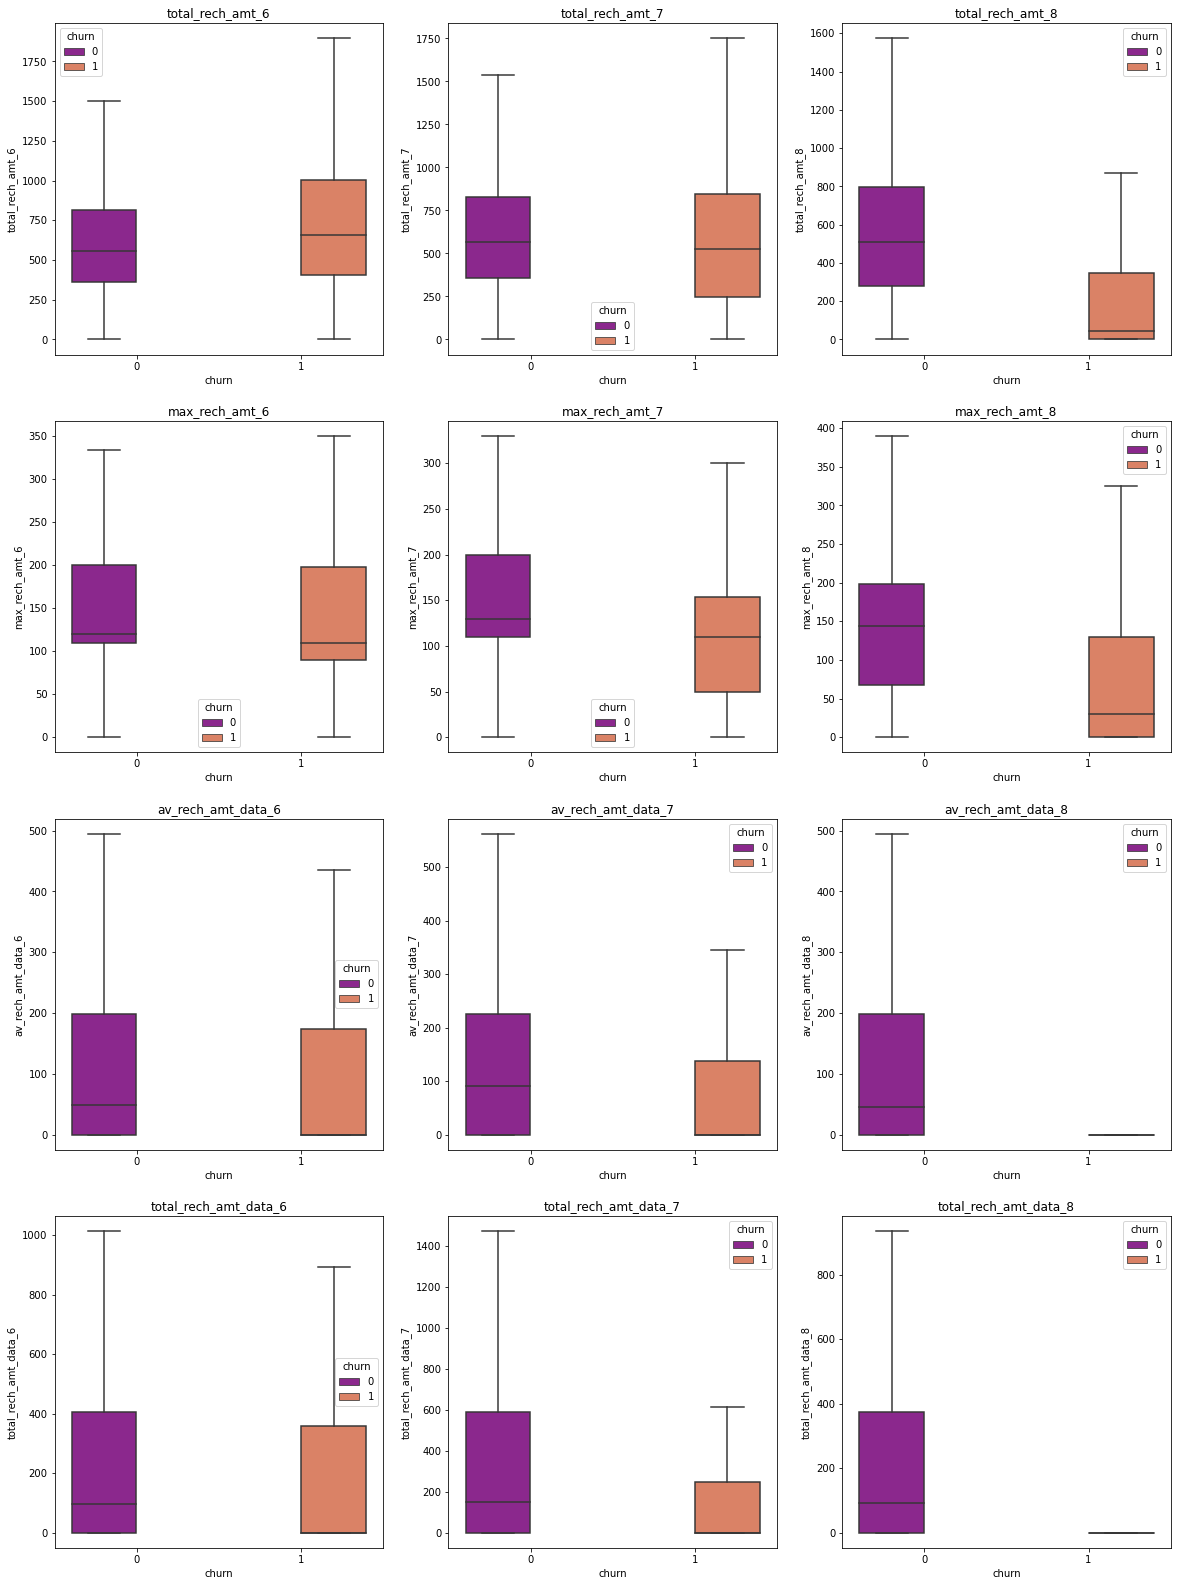

In [31]:
plt.figure(figsize=(20,50))
for attribute,pos in itertools.zip_longest(recharge_amnt_columns,range(len(recharge_amnt_columns))):
    plt.subplot(7,3,pos+1)
    # plt.subplots_adjust(
    #                 wspace=0.4,
    #                 hspace=2)
    sns.boxplot(data=churn_data_hvc, y=attribute,x="churn",hue="churn",
                showfliers=False,palette=("plasma"))
    #axs=churn_data_hvc[column].value_counts().plot.bar()
    plt.title(attribute)

##### We can see a drop in the total recharge amount for churned customers in the 8th Month (Action Phase).

In [32]:
churn_data_hvc.loc[:,['max_rech_data_6','max_rech_data_7','max_rech_data_8']] \
= churn_data_hvc.loc[:,['max_rech_data_6','max_rech_data_7','max_rech_data_8']].replace(np.nan,0)

#### Data Variables

In [33]:
data_columns =  churn_data_hvc.columns[churn_data_hvc.columns.str.contains('2g|3g',regex=True)]
list(data_columns)

['count_rech_2g_6',
 'count_rech_2g_7',
 'count_rech_2g_8',
 'count_rech_3g_6',
 'count_rech_3g_7',
 'count_rech_3g_8',
 'vol_2g_mb_6',
 'vol_2g_mb_7',
 'vol_2g_mb_8',
 'vol_3g_mb_6',
 'vol_3g_mb_7',
 'vol_3g_mb_8',
 'arpu_3g_6',
 'arpu_3g_7',
 'arpu_3g_8',
 'arpu_2g_6',
 'arpu_2g_7',
 'arpu_2g_8',
 'monthly_2g_6',
 'monthly_2g_7',
 'monthly_2g_8',
 'sachet_2g_6',
 'sachet_2g_7',
 'sachet_2g_8',
 'monthly_3g_6',
 'monthly_3g_7',
 'monthly_3g_8',
 'sachet_3g_6',
 'sachet_3g_7',
 'sachet_3g_8',
 'aug_vbc_3g',
 'jul_vbc_3g',
 'jun_vbc_3g',
 'sep_vbc_3g']

In [34]:
len(data_columns)

34

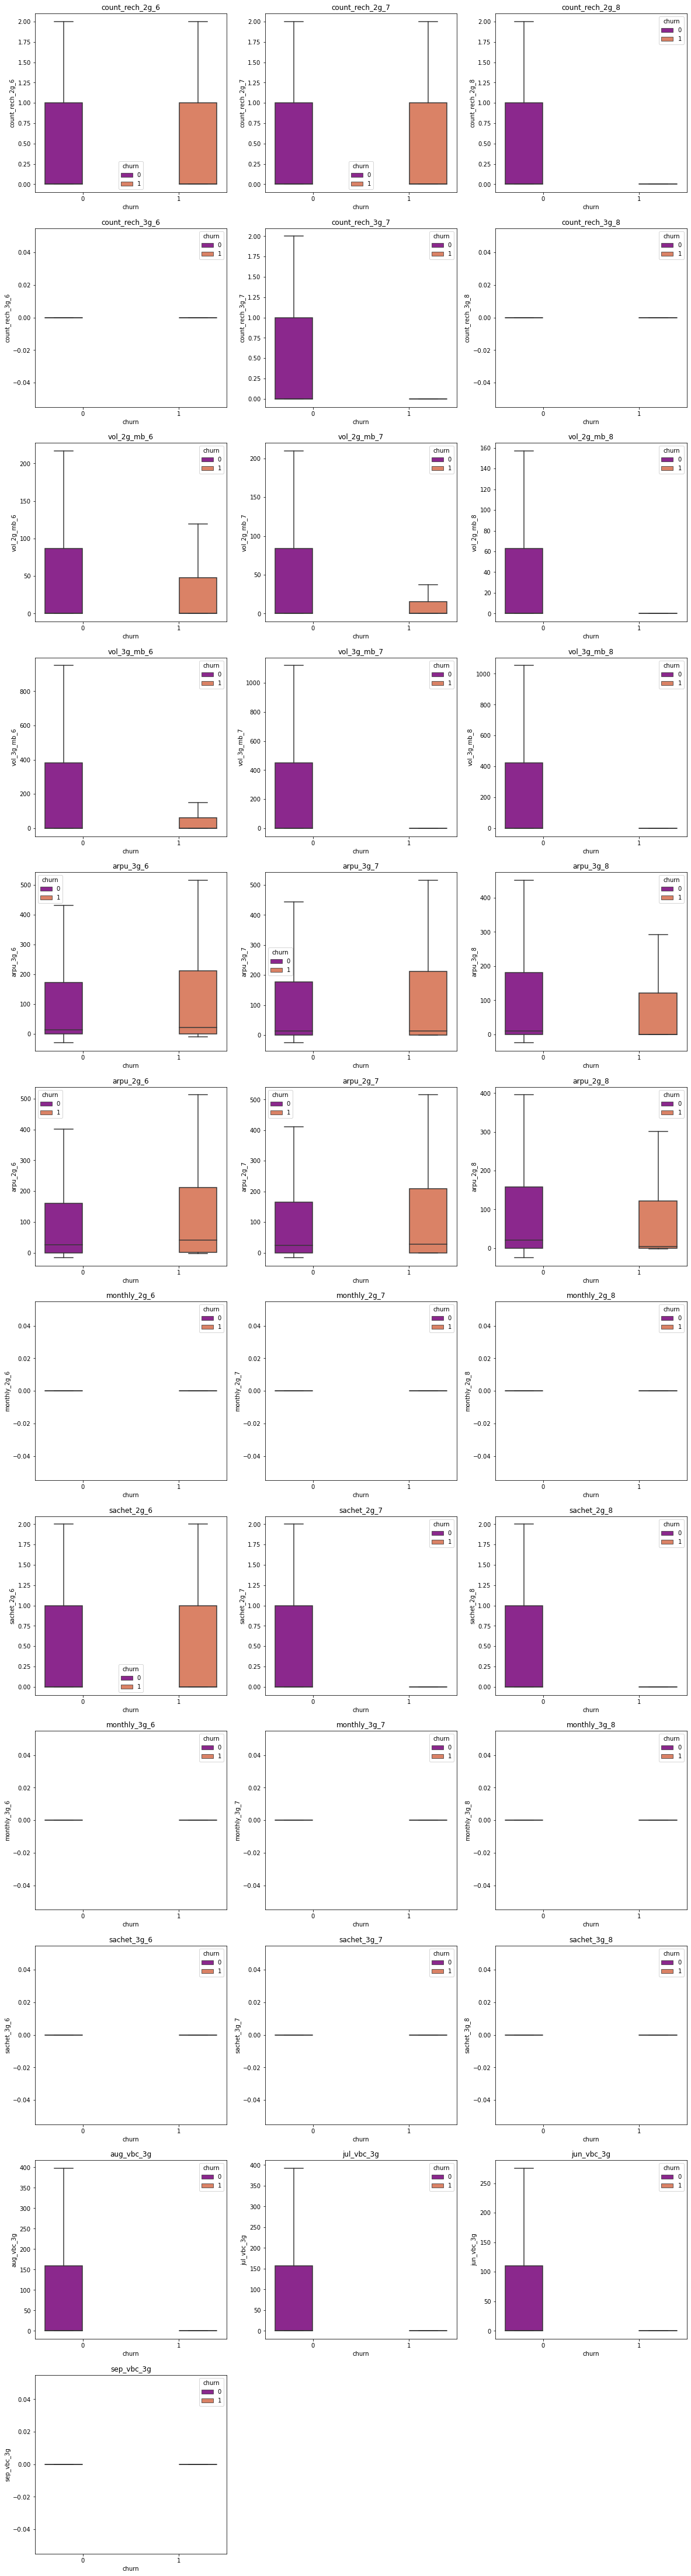

In [35]:
plt.figure(figsize=(20,80))
for attribute,pos in itertools.zip_longest(data_columns,range(len(data_columns))):
    plt.subplot(12,3,pos+1)
    # plt.subplots_adjust(
    #                 wspace=0.4,
    #                 hspace=1)
    sns.boxplot(data=churn_data_hvc, y=attribute,x="churn",hue="churn",
                showfliers=False,palette=("plasma"))
    #axs=churn_data_hvc[column].value_counts().plot.bar()
    plt.title(attribute)

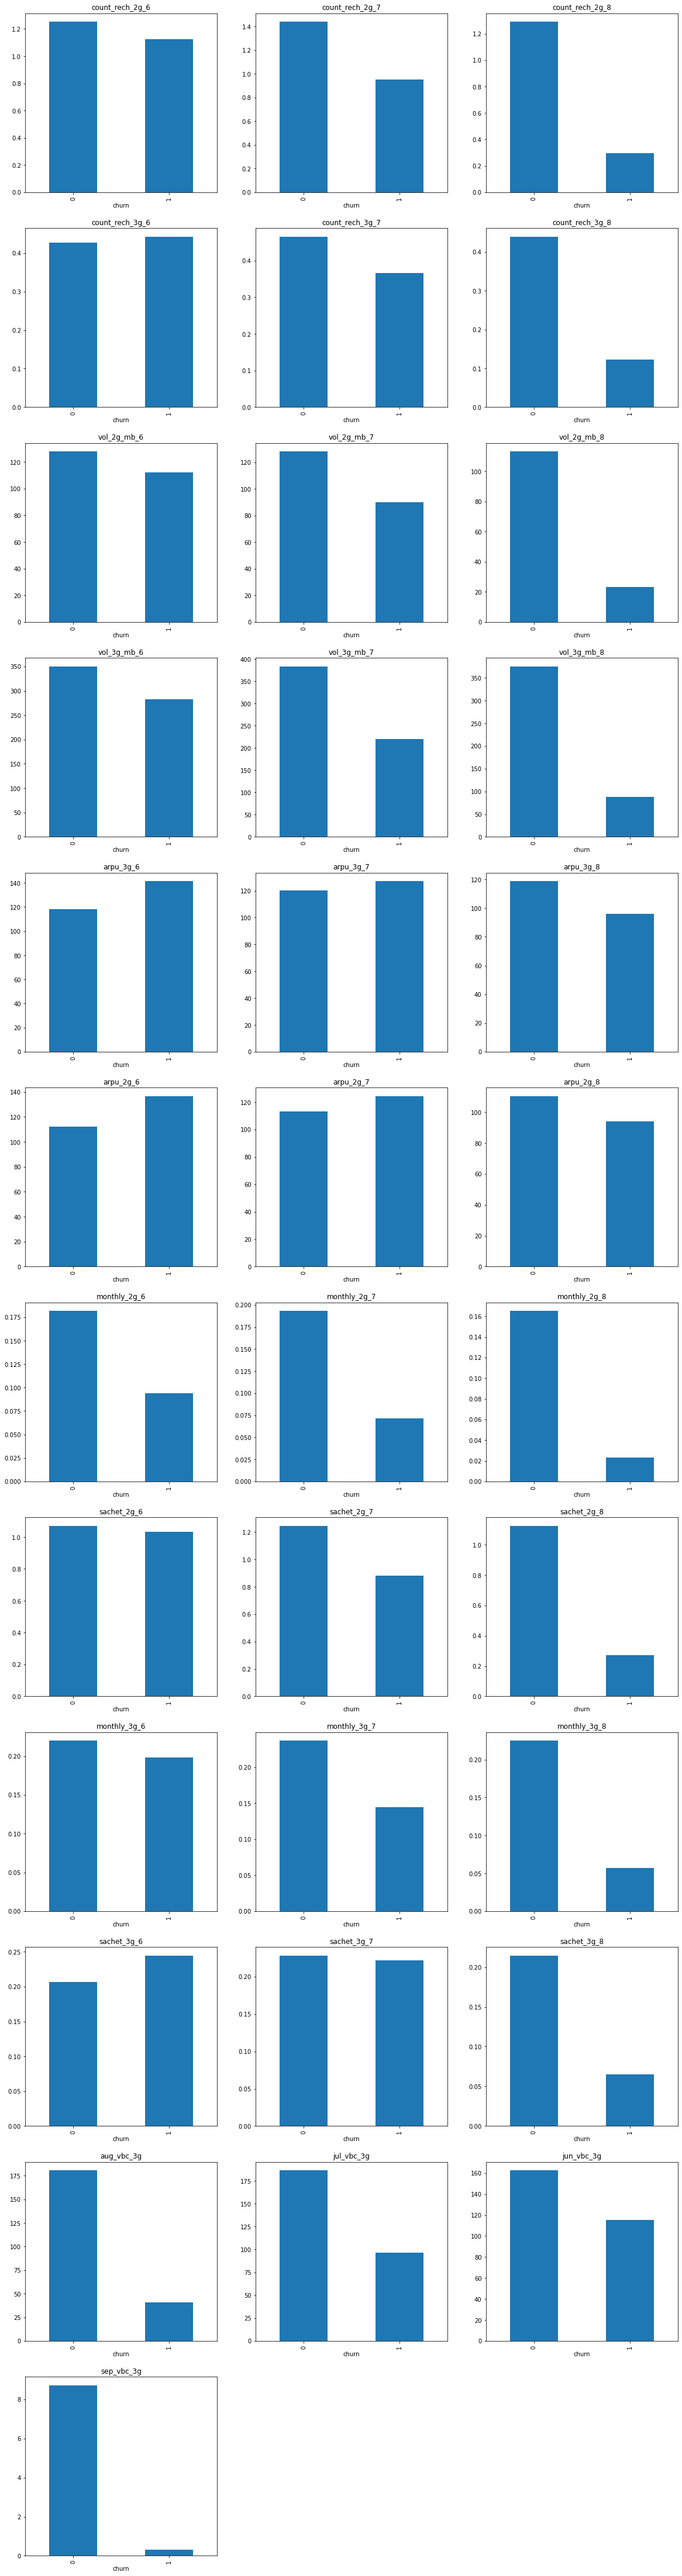

In [36]:
plt.figure(figsize=(20,80))
for attribute,pos in itertools.zip_longest(data_columns,range(len(data_columns))):
    plt.subplot(12,3,pos+1)
    # plt.subplots_adjust(
    #                 wspace=0.4,
    #                 hspace=1)
    churn_data_hvc.groupby(['churn'])[attribute].mean().plot.bar()
    #axs=churn_data_hvc[column].value_counts().plot.bar()
    plt.title(attribute)

#### 1.) The average revenue per user is greater for churned customer which indicates some high value cutomers are being churned
#### 2.) We can see that huge drops for data usage in 8th month for churned customers

### MoU Variables 

In [37]:
mou_cols = churn_data_hvc.columns[churn_data_hvc.columns.str.contains('mou')]

In [38]:
mou_cols

Index(['loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou', 'onnet_mou_6',
       'onnet_mou_7', 'onnet_mou_8', 'offnet_mou_6', 'offnet_mou_7',
       'offnet_mou_8', 'roam_ic_mou_6', 'roam_ic_mou_7', 'roam_ic_mou_8',
       'roam_og_mou_6', 'roam_og_mou_7', 'roam_og_mou_8', 'loc_og_t2t_mou_6',
       'loc_og_t2t_mou_7', 'loc_og_t2t_mou_8', 'loc_og_t2m_mou_6',
       'loc_og_t2m_mou_7', 'loc_og_t2m_mou_8', 'loc_og_t2f_mou_6',
       'loc_og_t2f_mou_7', 'loc_og_t2f_mou_8', 'loc_og_t2c_mou_6',
       'loc_og_t2c_mou_7', 'loc_og_t2c_mou_8', 'loc_og_mou_6', 'loc_og_mou_7',
       'loc_og_mou_8', 'std_og_t2t_mou_6', 'std_og_t2t_mou_7',
       'std_og_t2t_mou_8', 'std_og_t2m_mou_6', 'std_og_t2m_mou_7',
       'std_og_t2m_mou_8', 'std_og_t2f_mou_6', 'std_og_t2f_mou_7',
       'std_og_t2f_mou_8', 'std_og_t2c_mou_6', 'std_og_t2c_mou_7',
       'std_og_t2c_mou_8', 'std_og_mou_6', 'std_og_mou_7', 'std_og_mou_8',
       'isd_og_mou_6', 'isd_og_mou_7', 'isd_og_mou_8', 'spl_og_mou_6',
       'spl_o

In [39]:
churn_data_hvc.loc[:,mou_cols] = churn_data_hvc.loc[:,mou_cols].replace(np.NaN,0)

In [40]:
ic_cols = churn_data_hvc.columns[churn_data_hvc.columns.str.contains('.*_ic_.*',regex=True)]
len(ic_cols)

40

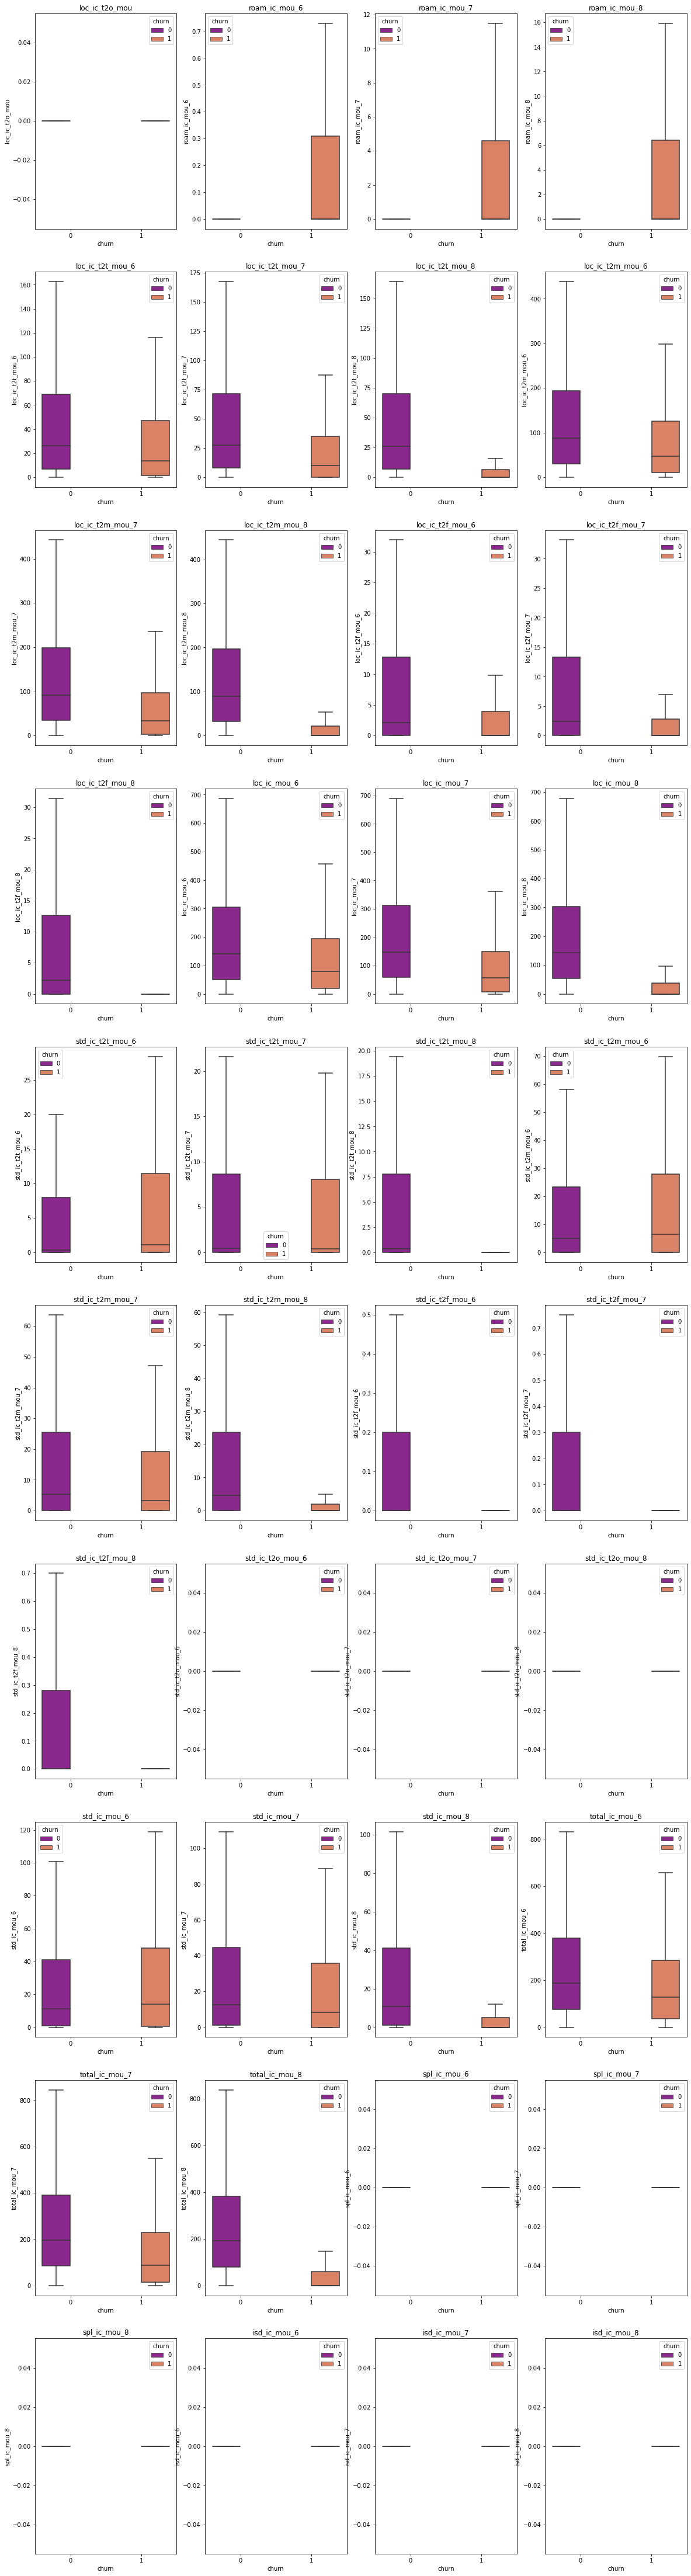

In [41]:
plt.figure(figsize=(20,80))
for attribute,pos in itertools.zip_longest(ic_cols,range(len(ic_cols))):
    plt.subplot(10,4,pos+1)
    # plt.subplots_adjust(
    #                 wspace=0.4,
    #                 hspace=1)
    sns.boxplot(data=churn_data_hvc, y=attribute,x="churn",hue="churn",
                showfliers=False,palette=("plasma"))
    #axs=churn_data_hvc[column].value_counts().plot.bar()
    plt.title(attribute)

#### The incoming went down significantly for churned customers during action phase i.e 8th month

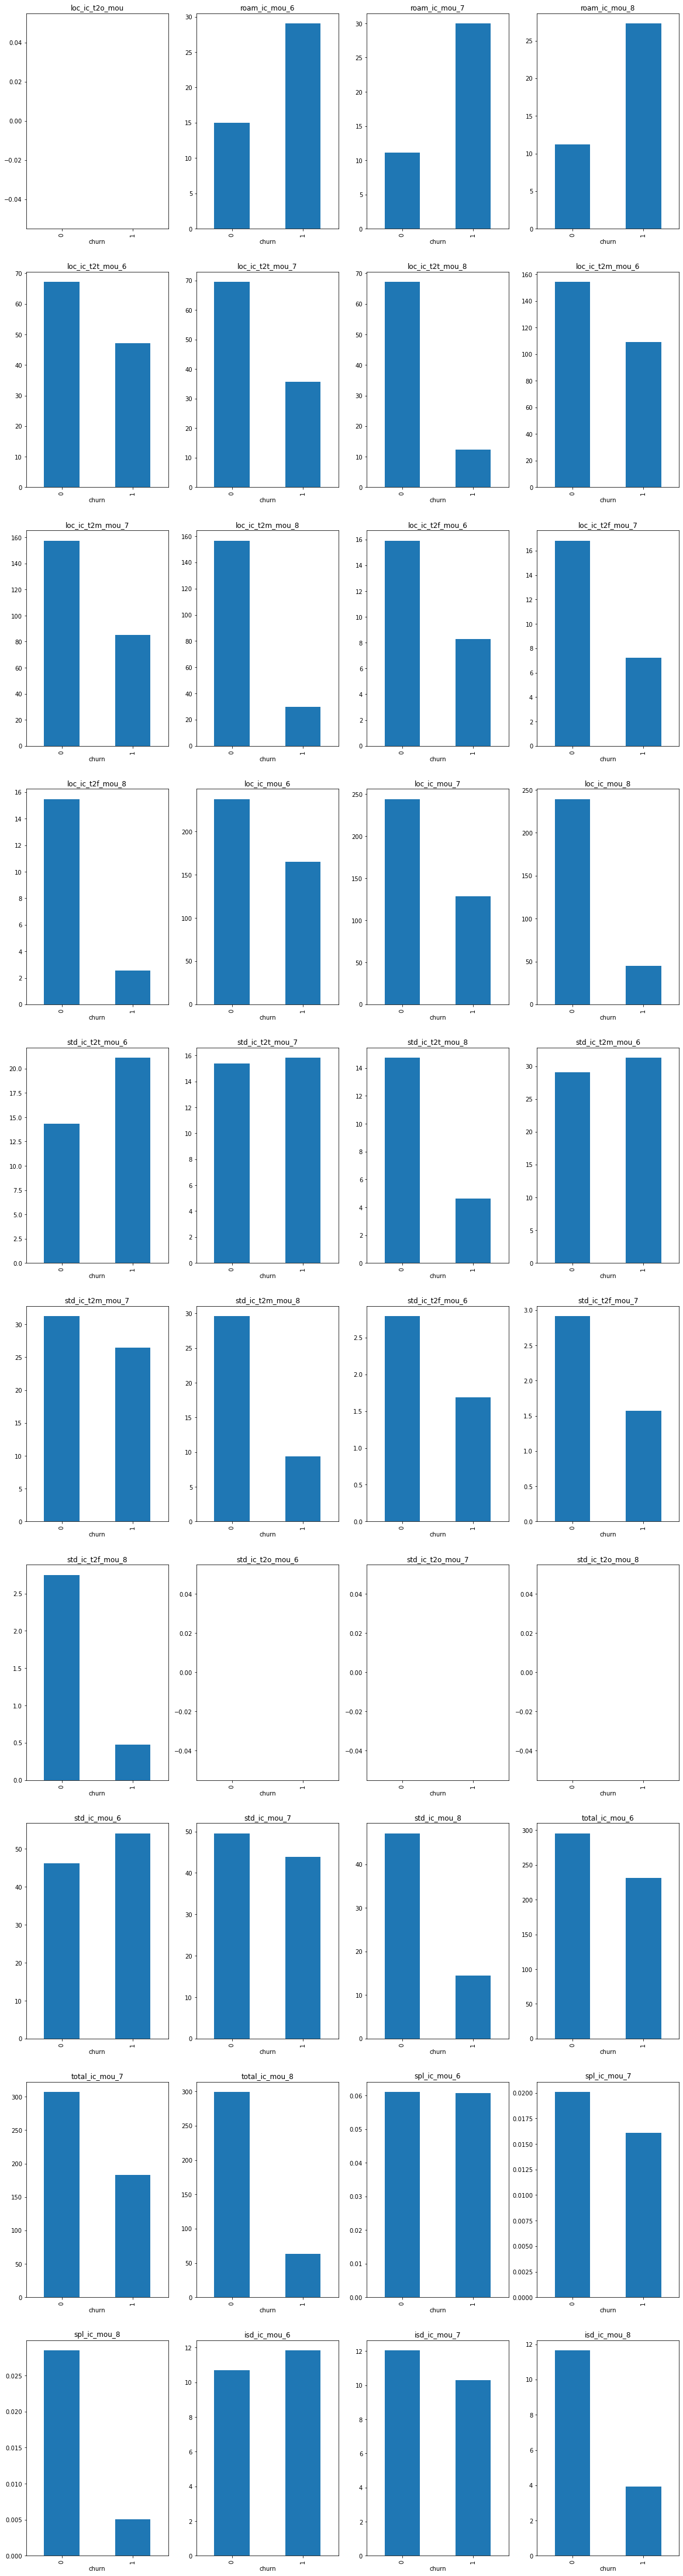

In [42]:
plt.figure(figsize=(20,80))
for attribute,pos in itertools.zip_longest(ic_cols,range(len(ic_cols))):
    plt.subplot(10,4,pos+1)
    # plt.subplots_adjust(
    #                 wspace=0.4,
    #                 hspace=1)
    churn_data_hvc.groupby(['churn'])[attribute].mean().plot.bar()
    #axs=churn_data_hvc[column].value_counts().plot.bar()
    plt.title(attribute)

In [43]:
og_cols = churn_data_hvc.columns[churn_data_hvc.columns.str.contains('.*_og_.*',regex=True)]
len(og_cols)

44

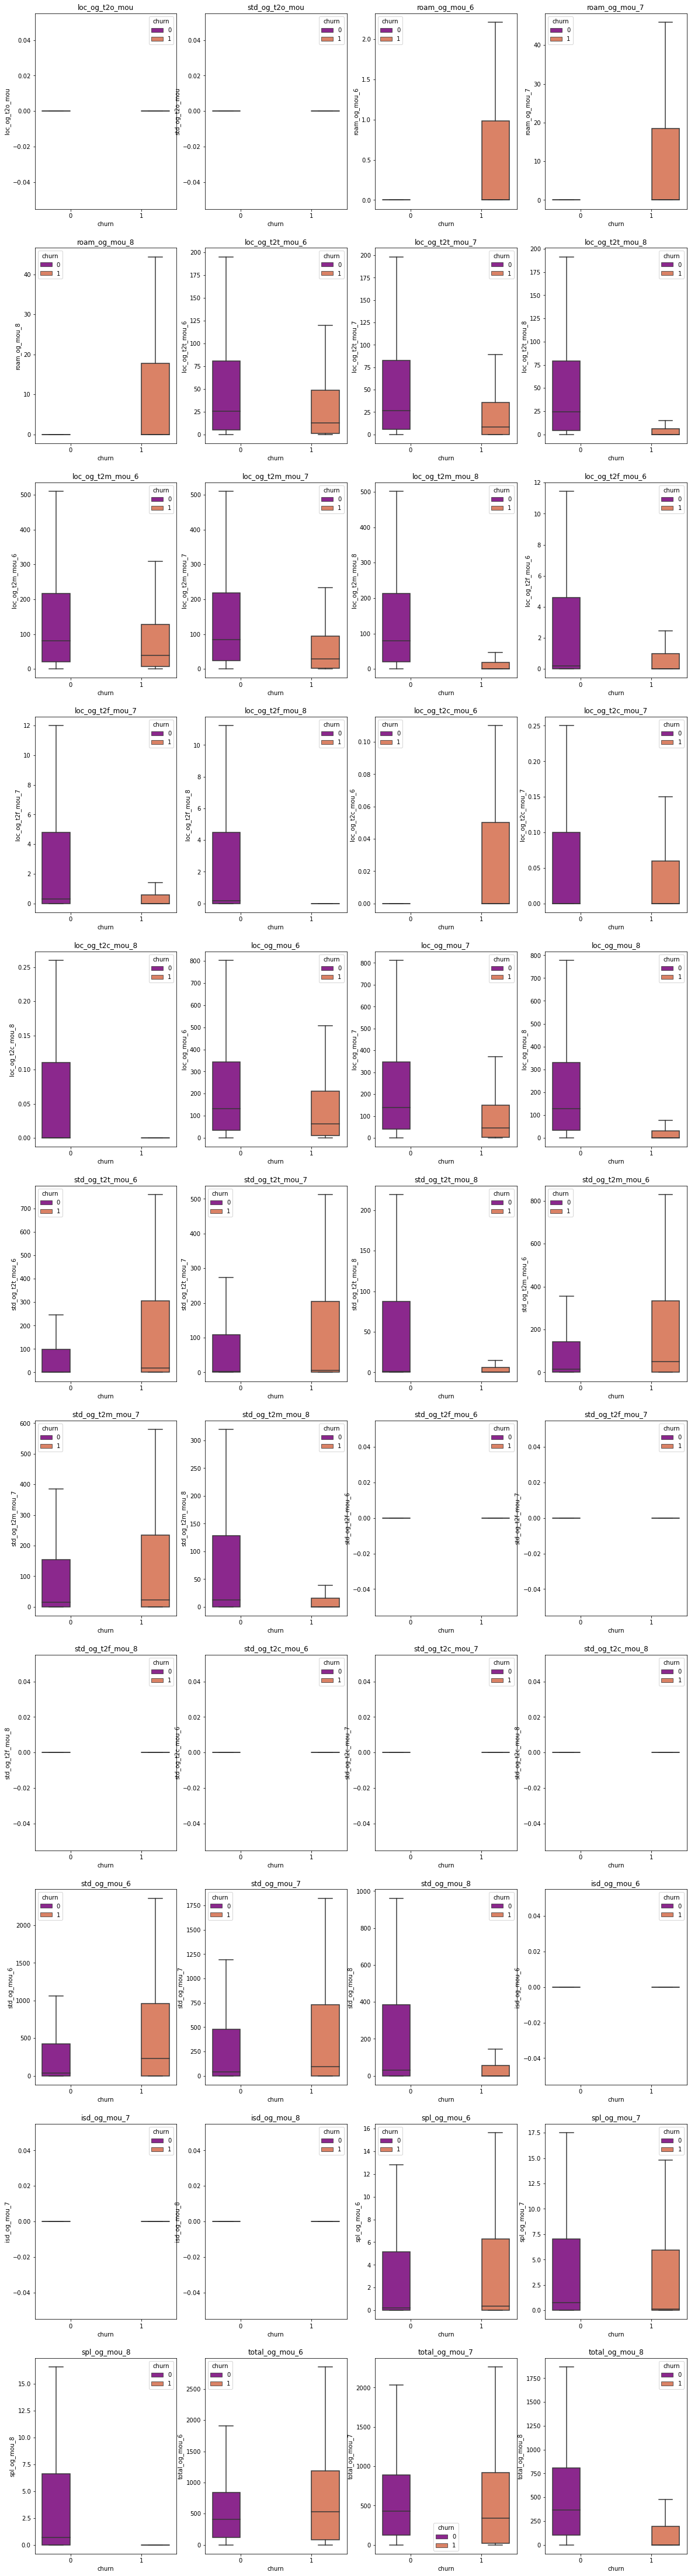

In [44]:
plt.figure(figsize=(20,80))
for attribute,pos in itertools.zip_longest(og_cols,range(len(og_cols))):
    plt.subplot(11,4,pos+1)
    # plt.subplots_adjust(
    #                 wspace=0.4,
    #                 hspace=1)
    sns.boxplot(data=churn_data_hvc, y=attribute,x="churn",hue="churn",
                showfliers=False,palette=("plasma"))
    #axs=churn_data_hvc[column].value_counts().plot.bar()
    plt.title(attribute)

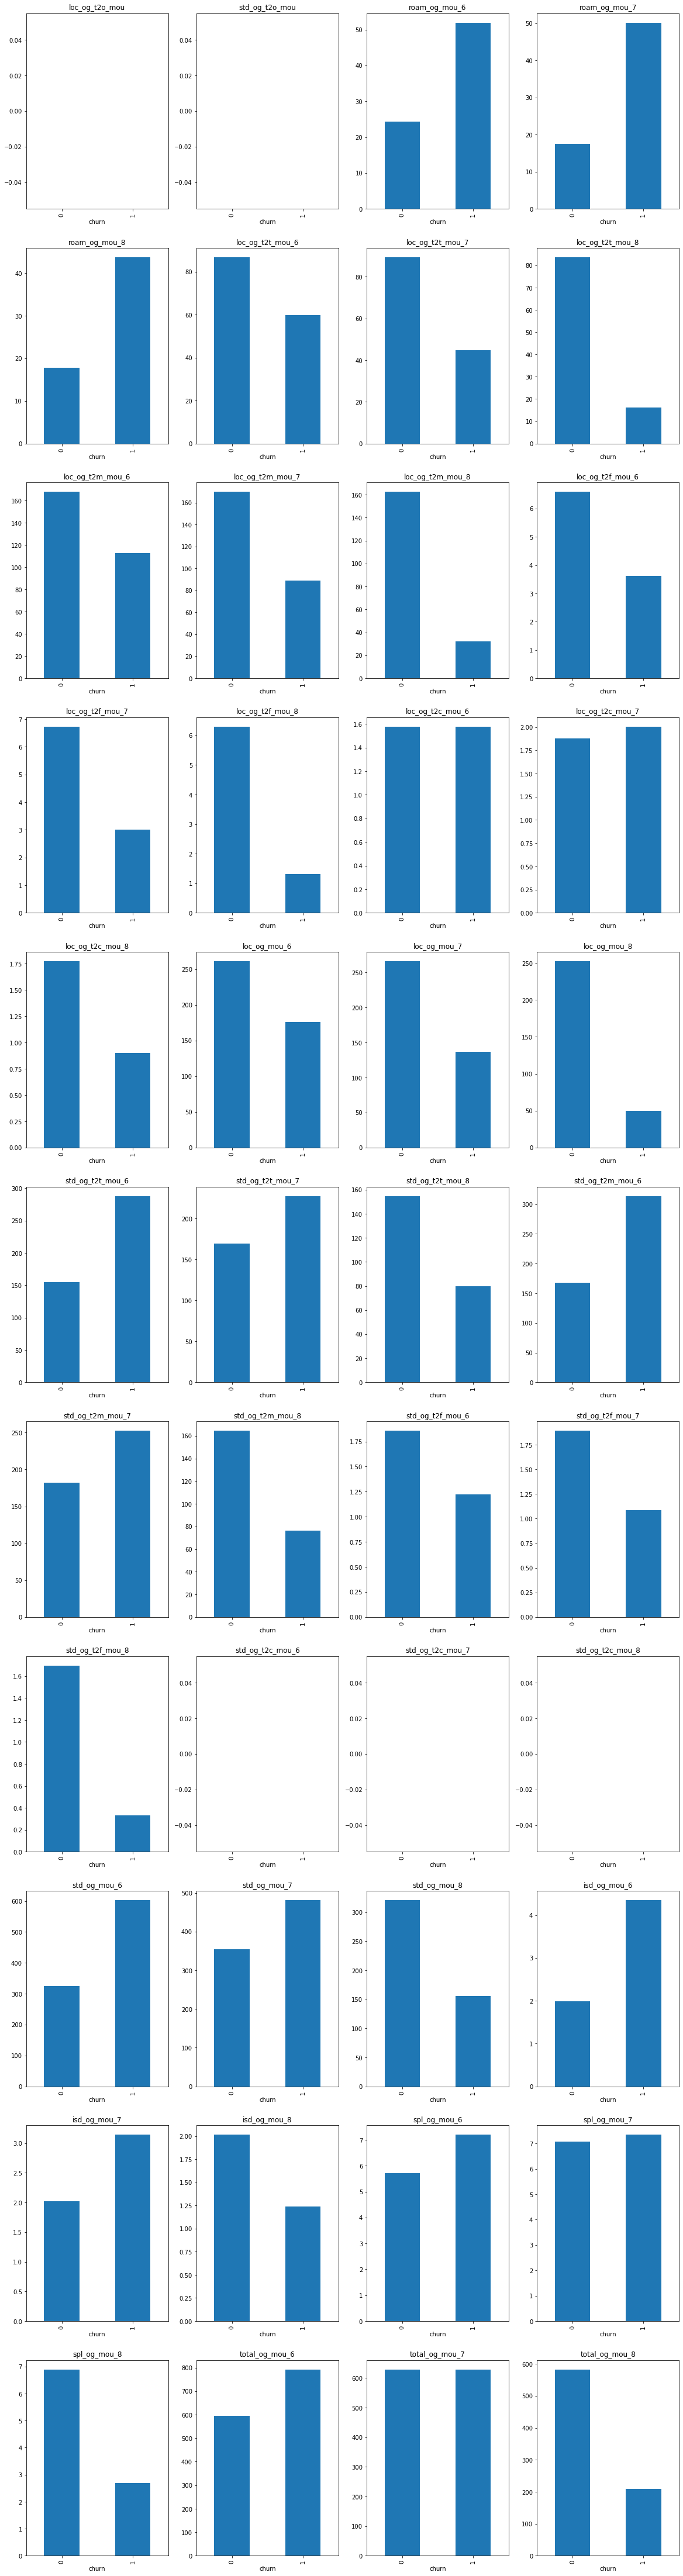

In [45]:
plt.figure(figsize=(20,80))
for attribute,pos in itertools.zip_longest(og_cols,range(len(og_cols))):
    plt.subplot(11,4,pos+1)
    # plt.subplots_adjust(
    #                 wspace=0.4,
    #                 hspace=1)
    churn_data_hvc.groupby(['churn'])[attribute].mean().plot.bar()
    #axs=churn_data_hvc[column].value_counts().plot.bar()
    plt.title(attribute)

#### The outgoing also went down significantly for churned customers during action phase i.e 8th month

### Tenure Analysis

In [46]:
churn_data_hvc['aon'].describe()

count    29953.000000
mean      1209.280573
std        957.449442
min        180.000000
25%        460.000000
50%        846.000000
75%       1756.000000
max       4321.000000
Name: aon, dtype: float64

#### We can make new column based on tenure range

In [47]:
churn_data_hvc['tenure'] = churn_data_hvc['aon']/30
tenure_range = [0, 6, 12, 24, 60, 200]
tenure_labels = [ '0-6 Months', '6-12 Months', '1-2 Yrs', '2-5 Yrs', 'More than 5 years']
churn_data_hvc['tenure_range'] = pd.cut(churn_data_hvc['tenure'], tenure_range, labels=tenure_labels)

In [48]:
churn_data_hvc['tenure_range'].value_counts()

2-5 Yrs              9562
1-2 Yrs              7940
More than 5 years    7303
6-12 Months          5133
0-6 Months             15
Name: tenure_range, dtype: int64

<AxesSubplot:>

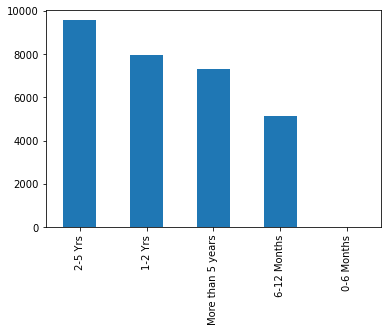

In [49]:
churn_data_hvc['tenure_range'].value_counts().plot.bar()

<AxesSubplot:xlabel='tenure_range'>

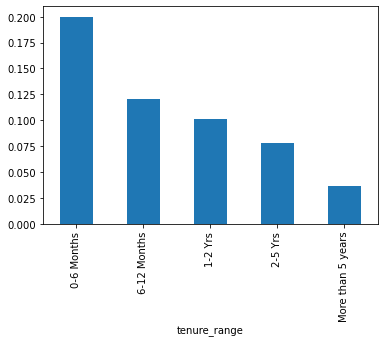

In [50]:
churn_data_hvc.groupby(['tenure_range'])['churn'].mean().plot.bar()

#### Short span customers i.e customers between 0-6 Months tend to churn more

In [51]:
col_info_final= round(churn_data_hvc.isnull().sum() / churn_data_hvc.shape[0] * 100.00,2)
col_info_final_to_impute = col_info_final[col_info_final>0].index

In [52]:
churn_data_hvc.loc[:,col_info_final_to_impute] = churn_data_hvc.loc[:,col_info_final_to_impute].replace(np.NaN,0)

## Modelling

In [53]:
churn_data_hvc.shape

(29953, 176)

Text(0.5, 1.0, 'Class Distributions \n (0: No Churn || 1: Churn)')

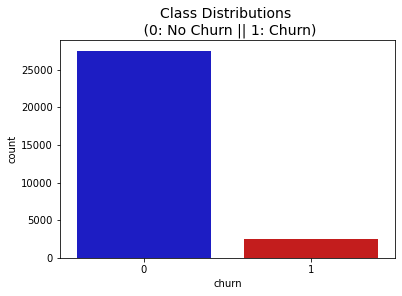

In [54]:
colors = ["#0101DF", "#DF0101"]

sns.countplot('churn', data=churn_data_hvc, palette=colors)
plt.title('Class Distributions \n (0: No Churn || 1: Churn)', fontsize=14)

We can see that data is highly imbalanced so it is important to handle imbalanced classes.

In [55]:
# Create Train and Test Sets
from sklearn.model_selection import train_test_split
y = churn_data_hvc.churn
X = churn_data_hvc.drop(['churn','mobile_number','circle_id'], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify = y, random_state=56)

### Feature Scaling

In [56]:
from sklearn.preprocessing import StandardScaler

In [57]:
col_df = pd.DataFrame(X_train.describe())

In [58]:
num_cols_in_Xtrain = col_df.columns
len(num_cols_in_Xtrain)

166

In [59]:
scaler = StandardScaler()
X_train[num_cols_in_Xtrain] = scaler.fit_transform(X_train[num_cols_in_Xtrain])

X_train.shape

(20967, 173)

In [61]:
# SMOTE
from imblearn.over_sampling import SMOTE
smt = SMOTE(random_state=45, k_neighbors=5)
X_resampled_smt, y_resampled_smt = smt.fit_resample(X_train[num_cols_in_Xtrain], y_train)
len(X_resampled_smt)

38528

In [64]:
X_resampled_smt.shape

(38528, 166)

In [70]:
y_resampled_smt.value_counts()

0    19264
1    19264
Name: churn, dtype: int64

### Feature Selection Using RFE

In [72]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [73]:
from sklearn.feature_selection import RFE
rfe = RFE(logreg, n_features_to_select=30)             # running RFE with 30 variables as output
rfe = rfe.fit(X_resampled_smt, y_resampled_smt)

In [75]:
col = X_resampled_smt.columns[rfe.support_]
col

Index(['arpu_6', 'arpu_7', 'onnet_mou_7', 'loc_og_mou_8', 'std_og_t2t_mou_7',
       'std_og_t2f_mou_8', 'isd_og_mou_8', 'total_og_mou_8',
       'loc_ic_t2m_mou_7', 'loc_ic_t2m_mou_8', 'loc_ic_mou_8',
       'std_ic_t2t_mou_7', 'std_ic_t2t_mou_8', 'std_ic_mou_8',
       'total_ic_mou_7', 'total_ic_mou_8', 'spl_ic_mou_8', 'total_rech_num_8',
       'last_day_rch_amt_8', 'total_rech_data_6', 'max_rech_data_6',
       'av_rech_amt_data_6', 'vol_2g_mb_8', 'arpu_2g_6', 'monthly_2g_7',
       'fb_user_8', 'aon', 'aug_vbc_3g', 'sep_vbc_3g',
       'total_rech_amt_data_8'],
      dtype='object')

In [77]:
import statsmodels.api as sm

In [80]:
X_resampled_smt[col]

,arpu_6,arpu_7,onnet_mou_7,loc_og_mou_8,std_og_t2t_mou_7,std_og_t2f_mou_8,isd_og_mou_8,total_og_mou_8,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,...,max_rech_data_6,av_rech_amt_data_6,vol_2g_mb_8,arpu_2g_6,monthly_2g_7,fb_user_8,aon,aug_vbc_3g,sep_vbc_3g,total_rech_amt_data_8
0,-0.465446,0.582978,-0.075677,0.272330,-0.413250,3.434164,-0.041489,-0.238378,-0.369902,-0.444323,...,-0.688503,-0.647860,-0.341715,-0.392068,-0.408291,-0.955627,1.105340,-0.402356,-0.153902,-0.278011
1,-0.349877,-0.154860,1.732654,-0.371509,2.202573,-0.144901,-0.041489,0.127137,-0.669134,-0.554935,...,-0.688503,-0.647860,-0.341715,-0.392068,-0.408291,-0.955627,-0.790967,-0.402356,-0.153902,-0.278011
2,0.652457,0.507251,0.140621,0.033344,0.337418,2.900561,-0.041489,0.022043,0.452442,0.262916,...,1.551020,0.608995,0.874705,1.200023,-0.408291,1.046434,-0.483458,1.717269,-0.153902,-0.124134
3,0.018130,-0.398686,-0.470295,-0.634631,-0.319250,-0.144901,-0.041489,-0.485443,-0.065024,-0.309306,...,-0.688503,-0.647860,-0.341715,-0.392068,-0.408291,-0.955627,-0.666499,-0.402356,-0.153902,-0.278011
4,-0.405340,-0.075366,-0.445918,0.191239,-0.387932,-0.144901,-0.041489,-0.311416,-0.133618,-0.350924,...,-0.484102,-0.348609,0.094331,-0.341810,1.826281,1.046434,2.001719,-0.402356,-0.153902,-0.229161
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38523,0.198570,0.017145,-0.351307,-0.439606,-0.387620,-0.144901,-0.037342,-0.655660,2.934926,-0.030505,...,0.586183,0.623915,-0.341715,-0.328720,1.210450,-0.955627,0.661458,-0.372225,-0.153902,-0.278011
38524,1.583225,2.476320,-0.554991,-0.645170,-0.413751,-0.144901,-0.041489,-0.779611,-0.696952,-0.677378,...,13.130773,7.107735,-0.331755,7.948266,-0.408291,1.046434,-0.619550,0.045302,-0.153902,0.465121
38525,0.765059,-0.809837,-0.349887,-0.645170,-0.413373,-0.144901,-0.041489,-0.779611,-0.619517,-0.677378,...,-0.688503,-0.647860,-0.341715,-0.392068,-0.408291,-0.955627,0.201675,-0.402356,-0.153902,-0.278011
38526,0.158788,-0.115979,-0.282699,-0.207300,-0.197749,-0.144901,-0.041489,1.006764,-0.311622,0.025044,...,-0.688503,-0.647860,-0.341715,-0.392068,-0.408291,-0.955627,0.635075,-0.402356,-0.153902,-0.278011


In [81]:
X_train_sm = sm.add_constant(X_resampled_smt[col])
logm2 = sm.GLM(y_resampled_smt,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                38528
Model:                            GLM   Df Residuals:                    38497
Model Family:                Binomial   Df Model:                           30
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -14224.
Date:                Mon, 17 Apr 2023   Deviance:                       28447.
Time:                        16:42:48   Pearson chi2:                 3.52e+05
No. Iterations:                     8   Pseudo R-squ. (CS):             0.4769
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -2.2983      0.035    -66.403      0.000      -2.366      -2.230
arpu_6                    0.2628      0.023     11.195      0.000       0.217       0.309
arpu_7                    0.3922      0.031     12.457      0.000       0.331       0.454
onnet_mou_7               0.8392      0.065     12.873      0.000       0.711       0.967
loc_og_mou_8             -1.0360      0.061    -16.848      0.000      -1.157      -0.915
std_og_t2t_mou_7         -0.7082      0.060    -11.898      0.000      -0.825      -0.592
std_og_t2f_mou_8         -0.2378      0.048     -4.934      0.000      -0.332      -0.143
isd_og_mou_8             -0.5607      0.041    -13.624      0.000      -0.641      -0.480
total_og_mou_8           -0.6086      0.033    -18.507      0.000      -0.673      -0.544
loc_ic_t2m_mou_7          0.6066      0.063      9.576      0.000       0.482       0.731
loc_ic_t2m_mou_8         -0.6464      0.133     -4.852      0.000      -0.908      -0.385
loc_ic_mou_8             -1.3609      0.162     -8.412      0.000      -1.678      -1.044
std_ic_t2t_mou_7          0.2625      0.034      7.693      0.000       0.196       0.329
std_ic_t2t_mou_8         -0.4763      0.070     -6.781      0.000      -0.614      -0.339
std_ic_mou_8             -0.4085      0.068     -6.000      0.000      -0.542      -0.275
total_ic_mou_7            0.2459      0.060      4.112      0.000       0.129       0.363
total_ic_mou_8           -0.3115      0.138     -2.265      0.024      -0.581      -0.042
spl_ic_mou_8             -0.7826      0.044    -17.630      0.000      -0.870      -0.696
total_rech_num_8         -0.3619      0.025    -14.211      0.000      -0.412      -0.312
last_day_rch_amt_8       -0.3453      0.021    -16.340      0.000      -0.387      -0.304
total_rech_data_6         0.2895      0.024     11.969      0.000       0.242       0.337
max_rech_data_6           0.2472      0.032      7.830      0.000       0.185       0.309
av_rech_amt_data_6       -0.6202      0.054    -11.580      0.000      -0.725      -0.515
vol_2g_mb_8              -0.2793      0.035     -7.869      0.000      -0.349      -0.210
arpu_2g_6                 0.3830      0.041      9.329      0.000       0.303       0.463
monthly_2g_7             -0.2727      0.023    -11.614      0.000      -0.319      -0.227
fb_user_8                -0.6483      0.024    -27.345      0.000      -0.695      -0.602
aon                      -0.3714      0.019    -19.250      0.000      -0.409      -0.334
aug_vbc_3g               -0.2237      0.032     -7.097      0.000      -0.285      -0.162
sep_vbc_3g               -1.1978      0.106    -11.270      0.000      -1.406      -0.989
total_rech_amt_data_8    -0.7824      0.071    -11.011      0.000      -0.922      -0.643
=======================

In [82]:
y_train_pred = res.predict(X_train_sm)
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.18800306, 0.58871915, 0.01096651, 0.09965723, 0.06197491,
       0.0041091 , 0.6176018 , 0.21999785, 0.07153305, 0.58267574])

##### Creating a dataframe with the actual Churn flag and the predicted probabilities

In [83]:
y_train_pred_final = pd.DataFrame({'Churn':y_resampled_smt.values, 'Conversion_Probability':y_train_pred})
y_train_pred_final['Cust ID'] = y_resampled_smt.index
y_train_pred_final.head()

,Churn,Conversion_Probability,Cust ID
0,0,0.188003,0
1,0,0.588719,1
2,0,0.010967,2
3,0,0.099657,3
4,0,0.061975,4


In [84]:
y_train_pred_final['predicted'] = y_train_pred_final.Conversion_Probability.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Churn,Conversion_Probability,Cust ID,predicted
0,0,0.188003,0,0
1,0,0.588719,1,1
2,0,0.010967,2,0
3,0,0.099657,3,0
4,0,0.061975,4,0


In [85]:
from sklearn import metrics

In [86]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Churn, y_train_pred_final.predicted )
print(confusion)

[[15904  3360]
 [ 2584 16680]]


In [88]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Churn, y_train_pred_final.predicted))

0.8457225913621262


#### So we have created a logistic regression model using RFE feature elimination(top 30 variables) and it is giving pretty good accuracy on training 

### Making predictions on the test set

In [89]:
X_test[num_cols_in_Xtrain] = scaler.fit_transform(X_test[num_cols_in_Xtrain])

In [90]:
X_test = X_test[col]
X_test_sm = sm.add_constant(X_test)

In [91]:
X_test_sm.shape

(8986, 31)

In [92]:
y_test_pred = res.predict(X_test_sm)

In [93]:
y_test_pred_final = pd.DataFrame({'Churned_test':y_test.values, 'Churned_Probability_test':y_test_pred})
y_test_pred_final['Cust ID'] = y_test.index
y_test_pred_final.head()

,Churned_test,Churned_Probability_test,Cust ID
76993,0,0.049745,76993
57465,0,0.512399,57465
55482,0,0.022184,55482
22947,1,0.937434,22947
10595,0,0.092340,10595


In [99]:
y_test_pred_final['final_predicted'] = y_test_pred_final.Churned_Probability_test.map(lambda x: 1 if x > 0.5 else 0)

In [100]:
y_test_pred_final.head()

,Churned_test,Churned_Probability_test,Cust ID,final_predicted
76993,0,0.049745,76993,0
57465,0,0.512399,57465,1
55482,0,0.022184,55482,0
22947,1,0.937434,22947,1
10595,0,0.092340,10595,0


In [101]:
confusion2 = metrics.confusion_matrix(y_test_pred_final.Churned_test, y_test_pred_final.final_predicted )
confusion2

array([[6825, 1431],
       [ 128,  602]], dtype=int64)

In [103]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_test_pred_final.Churned_test, y_test_pred_final.final_predicted)

0.8265079011796127

### We are getting an 82% accuracy using basic logistic regression. Now let's try PCA and Random Forest

In [104]:
from sklearn.decomposition import PCA

In [105]:
pca = PCA(random_state=42)

In [107]:
pca.fit(X_resampled_smt)

PCA(random_state=42)

In [108]:
pca.components_

array([[-1.12739077e-19, -1.66533454e-16, -0.00000000e+00, ...,
         7.49018916e-02,  8.49417595e-02,  1.36024589e-02],
       [-2.35996796e-20,  3.46944695e-18,  6.93889390e-17, ...,
         3.79749869e-02,  9.27306976e-02,  5.96594981e-02],
       [ 3.43041829e-19,  1.11022302e-16, -5.55111512e-17, ...,
        -6.87165914e-02, -1.25545053e-01,  8.85368782e-02],
       ...,
       [ 0.00000000e+00, -8.01692262e-02,  2.87569313e-01, ...,
         9.02056208e-17,  5.20990380e-02, -1.12613952e-01],
       [ 9.99999352e-01,  6.31237842e-04,  2.84510894e-04, ...,
        -3.15096256e-19,  1.97664993e-04,  8.12804075e-05],
       [-0.00000000e+00, -9.81980151e-02,  3.02433194e-01, ...,
        -1.04083409e-16, -7.26996493e-02, -5.97687009e-03]])

In [109]:
pca.explained_variance_ratio_

array([1.13321674e-01, 8.49557076e-02, 5.94859552e-02, 5.48059643e-02,
       5.21530706e-02, 3.87181328e-02, 3.30183409e-02, 3.21201616e-02,
       3.05326341e-02, 2.34811614e-02, 2.02414158e-02, 1.92202814e-02,
       1.85829838e-02, 1.70831553e-02, 1.60922390e-02, 1.50852054e-02,
       1.40364806e-02, 1.33350394e-02, 1.30894086e-02, 1.17407897e-02,
       1.14362627e-02, 1.09710486e-02, 1.07128975e-02, 9.89924096e-03,
       9.45258948e-03, 9.10512232e-03, 9.01990981e-03, 8.28868380e-03,
       8.15975616e-03, 7.63100025e-03, 7.49878855e-03, 7.16910840e-03,
       6.93438362e-03, 6.76049753e-03, 6.60274526e-03, 6.41262675e-03,
       6.29399077e-03, 6.19171933e-03, 5.87502300e-03, 5.76220903e-03,
       5.45490914e-03, 5.34113370e-03, 5.15967270e-03, 5.06220602e-03,
       4.75357941e-03, 4.70959437e-03, 4.50035778e-03, 4.42718507e-03,
       4.31990643e-03, 3.98505683e-03, 3.91560593e-03, 3.78256549e-03,
       3.59939371e-03, 3.41623155e-03, 3.33239691e-03, 3.22549867e-03,
      

<BarContainer object of 166 artists>

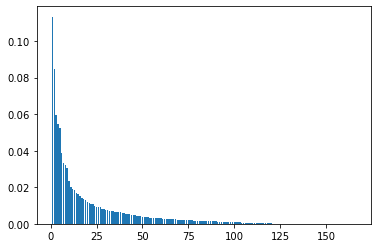

In [110]:
plt.bar(range(1,len(pca.explained_variance_ratio_)+1), pca.explained_variance_ratio_)

#### Making the scree plot

In [112]:
var_cumu = np.cumsum(pca.explained_variance_ratio_)

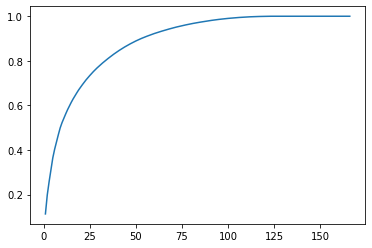

In [113]:
plt.plot(range(1,len(var_cumu)+1), var_cumu)

In [114]:
pc2 = PCA(n_components=50, random_state=42)

In [115]:
X_resampled_smt_new = pc2.fit_transform(X_resampled_smt)

In [116]:
X_resampled_smt_new.shape

(38528, 50)

In [125]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

In [119]:
rf = RandomForestClassifier(random_state=42, n_jobs=-1)

In [123]:
hyper_params = {'max_depth': range(3, 20),
                'max_features': range(3, 17),
                'min_samples_leaf': range(50, 200, 50),
                'n_estimators': range(50, 101, 10)}

In [126]:
model_rcv = RandomizedSearchCV(estimator=rf, 
                              param_distributions=hyper_params,
                              verbose=1,
                              cv=5,
                              return_train_score=True,
                              n_jobs=-1,
                              n_iter=50)

In [ ]:
model_rcv.fit(X_resampled_smt_new, y_resampled_smt)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
